This software and its source code are provided solely for the purpose of the peer-review process of Submission #71 titled "Privacy and Integrity Preserving Computations with CRISP" submitted to the 30th Usenix Security Symposium (2021). All other uses are forbidden.

This notebook contains necessary tools to explore the results of the conducted experiments.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
pd.set_option('display.max_columns', 999)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import data as dataframes


## Running


REMEBER TO ALSO CHANGE PARAMS.H WHEN RUNNING HEAAN 

In [3]:
# Load the feature csv for interpolated Garmin type 1 10-3-30 dataset 
df1=pd.read_csv('Garmin/BabelGarminAnalysis1-10-3-30.csv', encoding='utf-8', engine='python')
df1.describe()

,points,tmin,tmax,tavg,tstd,tmode,tmodeCount,tQ1,tQ25,tQ75,tQ9,tskew,tMAD,dmin,dmax,davg,dstd,dmode,dmodeCount,dQ1,dQ25,dQ75,dQ9,dIQ,dskew,dMAD,Vmin,Vmax,Vavg,Vstd,Vmode,VmodeCount,VQ1,VQ25,VQ75,VQ9,VIQ,Vskew,VMAD
count,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,1126.174430,0.999504,1.045011e+05,88.192266,2.992492e+03,2.914272,764.376611,1.106541,2.031219,2.940535,2.951437,-0.843685,0.043714,0.035926,1.599054e+09,3.231658e+06,6.995389e+07,0.036253,20.408821,5.923047,23.062197,134.243259,227.338841,0.678556,2.851412,67.737042,0.051625,2060.956516,6.558658,77.770670,0.052129,20.409812,1.140404,2.204678,4.200906,5.357069,0.329240,0.983930,1.422966
std,426.662259,0.022261,4.694281e+06,3850.985620,1.343968e+05,0.407033,312.511180,0.321556,0.480808,0.344130,0.323620,2.636368,0.250316,0.144259,1.775644e+10,4.362287e+07,8.401580e+08,0.144490,54.135756,6.826900,19.729705,139.988300,220.342097,0.187496,3.217308,75.772096,0.119251,23487.764494,39.805313,875.861203,0.120043,54.139558,0.790801,1.038088,1.635339,1.896482,0.192787,2.655567,0.870525
min,221.000000,0.000000,1.000000e+00,1.000000,0.000000e+00,1.000000,149.000000,1.000000,1.000000,1.000000,1.000000,-11.436938,0.000000,0.000000,2.449382e+00,1.195648e-02,1.127496e-01,0.000000,1.000000,0.000000,0.000000,0.003863,0.015932,0.079017,-0.670061,0.000000,0.000000,1.145160,0.019550,0.085844,0.000000,1.000000,0.000000,0.000000,0.020718,0.042493,0.038122,-2.290831,0.000000
25%,821.250000,1.000000,3.000000e+00,2.438439,6.924686e-01,3.000000,545.250000,1.000000,2.000000,3.000000,3.000000,-1.401291,0.000000,0.000000,4.819105e+02,5.898542e+01,6.107486e+01,0.000000,1.000000,1.834001,9.727925,76.247797,123.301049,0.543144,1.827360,38.236586,0.000000,9.558575,2.717295,1.292402,0.000000,1.000000,0.596590,1.669603,3.352454,4.248917,0.202091,0.308110,0.880894
50%,1117.000000,1.000000,3.000000e+00,2.532348,7.317682e-01,3.000000,756.000000,1.000000,2.000000,3.000000,3.000000,-1.198305,0.000000,0.000000,6.048781e+02,7.512276e+01,7.839198e+01,0.000000,6.000000,4.202755,19.182892,97.601367,163.106688,0.690857,2.218761,50.674309,0.000000,9.865273,3.099173,1.572905,0.000000,6.000000,0.984590,2.219586,3.826579,4.943981,0.268244,0.673259,1.167223
75%,1452.000000,1.000000,3.000000e+00,2.588792,7.749739e-01,3.000000,971.750000,1.000000,2.000000,3.000000,3.000000,-0.923275,0.000000,0.003372,8.220422e+02,9.702470e+01,1.035645e+02,0.003943,19.000000,7.941129,30.720489,124.077718,220.671345,0.824404,2.775903,65.347333,0.020603,9.972500,3.520224,1.969345,0.020978,19.000000,1.657679,2.656900,4.417691,5.899600,0.405814,1.012612,1.764695
max,1998.000000,1.000000,2.108772e+08,172997.038556,6.037395e+06,5.000000,1894.000000,3.000000,5.000000,6.000000,7.000000,38.340588,1.482602,2.055016,2.821813e+11,1.132127e+09,1.783475e+10,2.055016,809.000000,78.852177,220.380344,1012.899518,2312.895898,1.000000,38.131361,622.487843,1.192220,415216.842101,832.045278,15670.275968,1.192220,809.000000,6.622168,7.804792,11.410910,16.031385,1.000000,38.131360,6.224376


In [4]:
# Load first results of the run on CRISP
dfrun=pd.read_csv('Garmin/Manjaro_resDistUtils.csv', encoding='utf-8', engine='python')
dfrun.drop_duplicates()
dfrun['error']=dfrun['error']/100
dfrun.describe()

,logn,logq,points,RealRes,result,error,tinit,tcsv,tenc,tdist,tdec
count,2011.0,2011.0,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,13.0,208.0,1134.232223,8780.292183,8632.814458,0.042516,964.745066,4.010112,17.481084,176.400654,6.960033
std,0.0,0.0,434.227220,4497.654766,4847.038477,0.461699,69.038973,1.926867,3.242143,27.363689,1.949145
min,13.0,208.0,221.000000,40.836440,-30955.792429,-1.968854,800.029575,0.536493,13.209881,135.215963,4.711037
25%,13.0,208.0,827.000000,5686.097353,5721.254927,-0.006249,926.811743,2.987643,14.841018,153.912156,5.550286
50%,13.0,208.0,1120.000000,8448.105896,8520.813233,0.002087,954.556900,3.888603,16.992937,174.035091,6.690250
75%,13.0,208.0,1464.000000,10946.050941,11081.457541,0.015533,986.345369,4.849703,19.631089,194.458426,7.471592
max,13.0,208.0,2046.000000,35334.851279,31360.541213,10.538315,2420.202847,50.376723,46.445900,409.265839,31.071101


In [5]:
# Merge with feature csv for Garm XYTIn1 10-3-30
sdf1 = df1.merge(dfrun, on='Name', how='inner')
sdf1.describe()

,points_x,tmin,tmax,tavg,tstd,tmode,tmodeCount,tQ1,tQ25,tQ75,tQ9,tskew,tMAD,dmin,dmax,davg,dstd,dmode,dmodeCount,dQ1,dQ25,dQ75,dQ9,dIQ,dskew,dMAD,Vmin,Vmax,Vavg,Vstd,Vmode,VmodeCount,VQ1,VQ25,VQ75,VQ9,VIQ,Vskew,VMAD,logn,logq,points_y,RealRes,result,error,tinit,tcsv,tenc,tdist,tdec
count,1988.000000,1988.0,1.988000e+03,1988.000000,1.988000e+03,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.0,1988.0,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,1123.976861,1.0,1.060781e+05,89.486834,3.037640e+03,2.915996,762.641851,1.106640,2.031690,2.941650,2.952716,-0.848261,0.044374,0.036206,691.805764,95.979032,102.845771,0.036333,20.402414,5.914017,23.049152,133.842959,225.370090,0.677947,2.590872,67.425149,0.051830,9.895552,3.284059,1.690440,0.052023,20.400905,1.141021,2.202885,4.193546,5.342594,0.328606,0.733412,1.418401,13.0,208.0,1123.976861,8712.640028,8622.286668,0.044447,964.790908,3.987993,17.472179,176.356206,6.961239
std,426.067037,0.0,4.729568e+06,3879.933531,1.354071e+05,0.403165,312.014655,0.321869,0.481282,0.341134,0.320068,2.636643,0.252141,0.145210,387.676672,82.447201,85.834765,0.145212,54.477433,6.721165,19.572870,138.990611,213.968910,0.187504,2.195871,74.745026,0.119418,1.512681,1.150888,0.632470,0.119511,54.477957,0.786032,1.030592,1.629007,1.873957,0.192097,0.973898,0.867576,0.0,0.0,426.067037,4426.031971,4701.874923,0.460478,69.208164,1.923718,3.246583,27.350983,1.953178
min,221.000000,1.0,1.000000e+00,1.000000,0.000000e+00,1.000000,149.000000,1.000000,1.000000,1.000000,1.000000,-11.436938,0.000000,0.000000,2.449382,0.011956,0.112750,0.000000,1.000000,0.000000,0.000000,0.003863,0.015932,0.079017,-0.670061,0.000000,0.000000,1.145160,0.019550,0.085844,0.000000,1.000000,0.000000,0.000000,0.020718,0.042493,0.038122,-2.290831,0.000000,13.0,208.0,221.000000,40.836440,-30955.792429,-1.968854,800.029575,0.536493,13.209881,135.215963,4.711037
25%,821.000000,1.0,3.000000e+00,2.438886,6.925701e-01,3.000000,542.750000,1.000000,2.000000,3.000000,3.000000,-1.401554,0.000000,0.000000,480.790372,58.904772,60.770966,0.000000,1.000000,1.837325,9.769358,76.257317,123.226660,0.542397,1.819434,38.112633,0.000000,9.551590,2.714205,1.286617,0.000000,1.000000,0.597564,1.671808,3.351426,4.245618,0.201926,0.305770,0.879250,13.0,208.0,821.000000,5676.201295,5707.544771,-0.006236,926.828876,2.980526,14.840277,153.891994,5.547826
50%,1114.500000,1.0,3.000000e+00,2.532290,7.317682e-01,3.000000,754.500000,1.000000,2.000000,3.000000,3.000000,-1.198305,0.000000,0.000000,599.732982,74.795103,77.880301,0.000000,6.000000,4.202755,19.246410,97.565456,162.820111,0.690555,2.212519,50.609843,0.000000,9.861473,3.093810,1.564059,0.000000,6.000000,0.985006,2.217316,3.824773,4.941793,0.268244,0.666771,1.164132,13.0,208.0,1114.500000,8382.240819,8480.827938,0.002055,954.598668,3.852147,16.957015,173.957997,6.686797
75%,1447.250000,1.0,3.000000e+00,2.588841,7.749501e-01,3.000000,971.000000,1.000000,2.000000,3.000000,3.000000,-0.923782,0.000000,0.003855,809.484435,96.022250,101.264919,0.003967,19.000000,7.950867,30.777679,123.713384,219.554747,0.824347,2.757306,65.253213,0.020997,9.967875,3.498271,1.954813,0.021435,19.000000,1.661937,2.652315,4.409970,5.884060,0.404986,0.996529,1.758402,13.0,208.0,1447.250000,10837.012866,10949.234758,0.015200,986.344066,4.810827,19.611569,194.397976,7.471107
max,1998.000000,1.0,2.108772e+08,172997.038556,6.037395e+06,5.000000,1894.000000,3.000000,5.000000,6.000000,7.000000,38.340588,1.482602,2.055016,3417.167226,679.949293,579.559046,2.055016,809.000000,78.852177,220.380344,1012.899518,1450.395329,1.0000

In [6]:
data1 = sdf1[(sdf1['VQ25']>0.3)&((sdf1['dmax'])<30**2)&(sdf1['Vmax']<10)&((sdf1['tQ75'])>0)&(sdf1['RealRes']>15)]
(data1['error'].abs()).describe()

count    1607.000000
mean        0.014790
std         0.023074
min         0.000007
25%         0.003832
50%         0.008033
75%         0.015509
max         0.404691
Name: error, dtype: float64

In [7]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data1['RealRes']/data1['RealRes'], data1['result']/data1['RealRes']))

0.027401202560951302

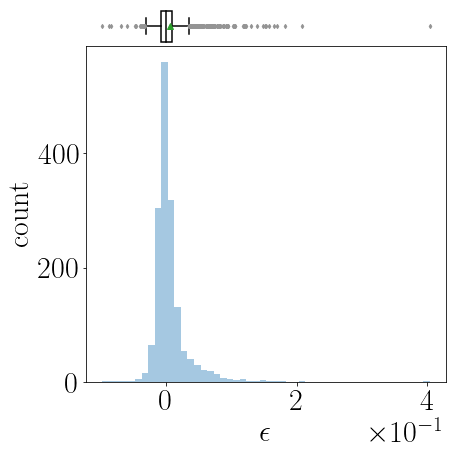

In [8]:
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 30})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7, 7),gridspec_kw={"height_ratios": (.1, .85), "hspace": (0)})
sns.boxplot(data1['error'], showmeans=True, ax=ax_box,color="aliceblue",fliersize="3") #showfliers=False,
plt.setp(ax_box.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax_box.lines, color='k')
sns.distplot(data1['error'], kde=False, ax=ax_hist)
ax_box.axis('off')
ax_hist.set(xlabel='$\epsilon$', ylabel='count')
ax_hist.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.tight_layout()
#f.savefig('images/RunHistGo.png')

In [9]:
sdf3 = (1-data1['error'].abs()/100)
sdf3.mean()

0.9998521031566877

## Genomics

In [10]:
dfgen=pd.read_csv('Genomic/Manjaro_resDSUtils.csv', encoding='utf-8', engine='python')
dfgen.drop_duplicates()
dfgen['error']=dfgen['error']/100
dfgen.describe()

,logn,logq,points,RealRes,result,error,tinit,tcsv,tenc,tdist,tdec
count,725.0,725.0,725.000000,725.000000,725.000000,7.250000e+02,725.000000,725.000000,725.000000,725.000000,725.000000
mean,12.0,96.0,172.800000,0.350460,0.350460,3.235862e-08,55.784990,0.759938,4.563568,22.398938,2.727303
std,0.0,0.0,95.529825,0.101197,0.101195,3.192696e-05,8.550985,0.572150,1.318721,4.458735,0.791900
min,12.0,96.0,100.000000,0.123313,0.123311,-1.334200e-04,41.773922,0.122768,2.941834,15.507467,1.688054
25%,12.0,96.0,122.000000,0.294099,0.294078,-1.596000e-05,47.527796,0.292616,3.715500,18.077040,2.157981
50%,12.0,96.0,131.000000,0.333877,0.333880,-1.040000e-06,57.403186,0.680625,4.371899,22.741914,2.638058
75%,12.0,96.0,150.000000,0.376421,0.376415,1.334000e-05,62.287838,1.128632,4.997781,25.288541,2.984668
max,12.0,96.0,361.000000,0.637015,0.637023,2.098000e-04,88.505229,5.449645,17.549101,41.625446,9.804177


In [11]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(dfgen['RealRes']/dfgen['RealRes'], dfgen['result']/dfgen['RealRes']))

3.181072214785222e-05

In [12]:
(dfgen['error'].abs()).describe()

count    7.250000e+02
mean     2.200268e-05
std      2.312023e-05
min      4.000000e-08
25%      6.590000e-06
50%      1.468000e-05
75%      2.875000e-05
max      2.098000e-04
Name: error, dtype: float64

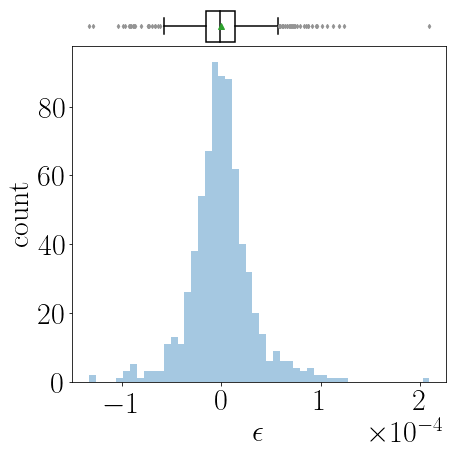

In [13]:
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 30})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7, 7),gridspec_kw={"height_ratios": (.1, .85), "hspace": (0)})
sns.boxplot(dfgen['error'], showmeans=True, ax=ax_box,color="aliceblue",fliersize="3") #showfliers=False, 
plt.setp(ax_box.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax_box.lines, color='k')
sns.distplot(dfgen['error'], kde=False,ax=ax_hist)
ax_box.axis('off')
ax_hist.set(xlabel='$\epsilon$', ylabel='count')
ax_hist.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.tight_layout()


In [14]:
sdfgen = (1-dfgen['error'].abs()/100)
sdfgen.mean()

0.9999997799732426

## Smart Meters

In [15]:
dfsm=pd.read_csv('SmartMeters/Manjaro_resSMUtils.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
# rmv id MAC000197
# rmv id MAC000037
dfsm['error']=dfsm['error']/100
dfsm.describe()

,logn,logq,points,RealRes,result,error,tinit,tcsv,tenc,tdist,tdec
count,1035.0,1035.0,1035.000000,1035.000000,1035.000000,1.035000e+03,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,11.0,91.0,33298.185507,6994.684047,6994.683142,-9.675942e-07,13.287146,73.109543,52.281487,126.659195,0.735868
std,0.0,0.0,4728.086487,5078.560455,5078.556672,8.796155e-05,2.606080,18.471085,12.172231,31.016775,0.348872
min,11.0,91.0,9105.000000,335.262000,335.045590,-1.058620e-03,8.723036,10.868027,11.578421,30.231167,0.551386
25%,11.0,91.0,32204.500000,3650.171500,3650.131754,-2.977500e-05,11.819340,67.394610,45.774529,109.371526,0.621337
50%,11.0,91.0,32930.000000,5776.500000,5776.352604,1.450000e-06,13.248781,72.095551,50.985223,119.107184,0.660494
75%,11.0,91.0,34781.000000,8840.303000,8840.178010,3.132000e-05,14.668807,78.154356,56.906526,137.397367,0.717319
max,11.0,91.0,39751.000000,44693.093009,44693.148786,8.711500e-04,28.161174,325.229384,165.973517,279.262157,5.763029


In [16]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(dfsm['RealRes']/dfsm['RealRes'], dfsm['result']/dfsm['RealRes']))

8.792447971516944e-05

In [17]:
(dfsm['error'].abs()).describe()

count    1.035000e+03
mean     5.068999e-05
std      7.187636e-05
min      2.000000e-08
25%      1.379500e-05
50%      3.053000e-05
75%      6.297500e-05
max      1.058620e-03
Name: error, dtype: float64

In [18]:
sdfsm = (1-dfsm['error'].abs()/100)
sdfsm.mean()

0.9999994931000951

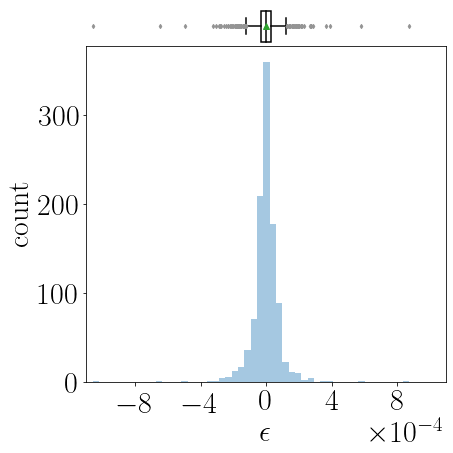

In [19]:
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 30})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7, 7),gridspec_kw={"height_ratios": (.1, .85), "hspace": (0)})
sns.boxplot(dfsm['error'],showmeans=True, ax=ax_box,color="aliceblue",fliersize="3") #showfliers=False,
plt.setp(ax_box.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax_box.lines, color='k')
sns.distplot(dfsm['error'], kde=False, ax=ax_hist)
ax_box.axis('off')
ax_hist.set(xlabel='$\epsilon$', ylabel='count')
ax_hist.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xlim(-0.0011, 0.0011)
plt.xticks([-0.0008,-0.0004,0,0.0004,0.0008])
plt.tight_layout()

# Timing analysis of the ZKCE

In [20]:
dfsm=pd.read_csv('ZKCEtimings/boolCirTime128.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
dfsm.describe()

,input,total,tgen,tsplit,tsign
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,17338.310000,231.860000,4.60000,42.440000,181.830000
std,9894.896041,17.810461,0.80403,10.458499,10.320182
min,421.000000,202.000000,4.00000,30.000000,163.000000
25%,8692.000000,217.750000,4.00000,33.000000,175.000000
50%,17205.000000,229.000000,4.00000,38.500000,179.500000
75%,26644.000000,245.250000,5.00000,53.000000,188.000000
max,32419.000000,287.000000,8.00000,64.000000,219.000000


In [21]:
dfsm=pd.read_csv('ZKCEtimings/boolCirTImeVer128.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
dfsm.describe()

,tver
count,100.000000
mean,73.080000
std,3.274265
min,68.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,86.000000


## Running

In [22]:
dfsm=pd.read_csv('ZKCEtimings/timings184.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
dfsm.describe()

,challenge,tgen,tsplit,tsign,tver
count,10958.000000,10958.000000,10958.000000,10958.000000,10958.000000
mean,1.000913,83.927677,214.349446,241.529686,257.904004
std,0.815452,9.102805,39.583950,26.281456,34.774496
min,0.000000,70.328000,158.593000,207.557000,193.749000
25%,0.000000,77.180250,184.692500,221.149250,236.496250
50%,1.000000,81.323500,199.709000,232.520000,251.693000
75%,2.000000,88.672250,234.939000,256.429500,277.776500
max,2.000000,150.642000,423.372000,596.182000,710.982000


In [23]:
res_df = {'challenge','tgen','tsplit','tsign','tver'}
#for k in range(dfsm.count()//219):
print(dfsm['challenge'].median())
print(dfsm['tgen'].mean())
print(dfsm['tsplit'].mean()*219)
print(dfsm['tsign'].mean()*219)
print('tprove=',(dfsm['tsplit'].mean()*219+dfsm['tsign'].mean()*219 + 2048*181.83)/1000/60) #208.35 for ZKBool proof 
print('tver=',(dfsm['tver'].mean()*219 + 2048*73.1)/1000/60)

1.0
83.92767749589345
46942.52870861478
52895.001170286516
tprove= 7.870422831315022
tver= 3.4364962796571787


## Disease Susceptibility

In [24]:
dfsm=pd.read_csv('ZKCEtimings/timings56.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
dfsm.describe()

,challenge,tgen,tsplit,tsign,tver
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,1.004201,26.972630,68.702565,49.228654,59.867745
std,0.814619,4.694207,11.336742,7.587282,9.701201
min,0.000000,19.550000,47.487000,40.120000,44.204000
25%,0.000000,23.458000,60.325750,42.811000,52.232000
50%,1.000000,25.801500,65.840000,45.898500,56.739500
75%,2.000000,29.978250,75.923750,55.745000,67.150500
max,2.000000,104.668000,233.543000,106.870000,183.163000


In [25]:
res_df = {'challenge','tgen','tsplit','tsign','tver'}
#for k in range(dfsm.count()//219):
print(dfsm['challenge'].median())
print(dfsm['tgen'].mean())
print(dfsm['tsplit'].mean()*219)
print(dfsm['tsign'].mean()*219)
print('tprove=',dfsm['tsplit'].mean()*219+dfsm['tsign'].mean()*219 + 2*181.83) # two hashes
print('tver=',dfsm['tver'].mean()*219 + 2*73.1)

1.0
26.97262986301367
15045.861640000043
10781.075180000033
tprove= 26190.596820000075
tver= 13257.236240000026


## Smart Metering

In [26]:
dfsm=pd.read_csv('ZKCEtimings/timings45.csv', encoding='utf-8', engine='python')
dfsm.drop_duplicates()
dfsm.describe()

,challenge,tgen,tsplit,tsign,tver
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,0.990320,14.943719,37.763240,24.944786,30.893644
std,0.818822,4.361342,8.973297,7.877633,7.810101
min,0.000000,8.893000,23.192000,17.728000,20.504000
25%,0.000000,12.028000,30.830750,20.246250,25.383250
50%,1.000000,14.202000,36.431500,24.264000,29.811000
75%,2.000000,16.607750,42.512000,27.844250,34.644500
max,2.000000,142.410000,277.135000,513.111000,428.445000


In [27]:
res_df = {'challenge','tgen','tsplit','tsign','tver'}
#for k in range(dfsm.count()//219):
print(dfsm['challenge'].median())
print(dfsm['tgen'].mean())
print(dfsm['tsplit'].mean()*219)
print('tprove=',(dfsm['tsplit'].mean()*219+dfsm['tsign'].mean()*219 + 1024*181.83)/1000/60) # 1024 slots
print('tver=',(dfsm['tver'].mean()*219 + 1024*73.1)/1000/60)

1.0
14.943719269406227
8270.14948
tprove= 3.3321162953333334
tver= 1.3603351339999996


# SM2: non linear price function

In [28]:
# Check the HE computation of the cumulative price function. Some values are negative.
# Will check the effect of the params in ckks

dfsm2=pd.read_csv('SmartMeters/Manjaro_resSM2Utils400.csv', encoding='utf-8', engine='python')
dfsm2.drop_duplicates()
# rmv id MAC000197
# rmv id MAC000037
dfsm2.describe()

,logn,logq,RealRes,RealResPol,result,error,errorPol,tinit,tcsv,tenc,tdist,tdec,in_mean,in_std,in_min,in_max
count,10543.0,10543.0,10543.000000,10543.000000,10543.000000,1.054300e+04,10543.000000,10543.000000,10543.000000,10543.000000,10543.000000,10543.000000,10543.000000,10543.000000,10543.0,10543.000000
mean,12.0,106.0,59.486347,64.905787,64.708893,2.437964e+03,-0.020958,173.307006,23.454385,134.566874,1352.450123,96.852647,0.142581,0.192640,0.0,1.600483
std,0.0,0.0,51.628110,53.295326,53.167742,8.753595e+04,1.780294,28.044523,7.001109,26.268873,230.843201,21.928726,0.111862,0.140296,0.0,0.902267
min,12.0,106.0,0.000200,12.633743,-926.982666,-1.846802e+02,-182.348373,136.298183,9.742516,54.447015,467.130897,33.117503,0.000000,0.000022,0.0,0.001000
25%,12.0,106.0,29.974500,36.161955,36.148298,4.275317e+00,-0.066618,151.503538,20.069291,119.014893,1223.430357,83.740970,0.073130,0.101497,0.0,0.993000
50%,12.0,106.0,47.744200,51.536510,51.543460,9.492242e+00,-0.003114,165.916471,22.146651,130.576359,1338.876982,93.421046,0.116483,0.160409,0.0,1.443000
75%,12.0,106.0,72.034350,74.616453,74.612477,2.078919e+01,0.061170,187.637776,25.913209,149.247708,1495.410325,105.982787,0.175408,0.239695,0.0,2.015000
max,12.0,106.0,1094.685901,1125.684250,939.218807,6.261205e+06,0.951224,273.882705,131.538231,237.034615,2276.773616,232.981786,1.650426,1.669538,0.0,6.821000


In [29]:
datasm2 = dfsm2[(dfsm2['RealRes']>20)]
(datasm2['errorPol'].abs()).describe()

count    9394.000000
mean        0.097690
std         1.881865
min         0.000001
25%         0.026774
50%         0.058813
75%         0.110111
max       182.348373
Name: errorPol, dtype: float64

In [30]:
(1-dfsm2['errorPol'].abs()/100).median()


0.99936142

In [31]:
datasm2 = dfsm2[(dfsm2['RealRes']>20)&(dfsm2['RealRes']<500)]
(datasm2['errorPol'].abs()).describe()

count    9379.000000
mean        0.078374
std         0.069745
min         0.000001
25%         0.026833
50%         0.058898
75%         0.110147
max         0.558733
Name: errorPol, dtype: float64